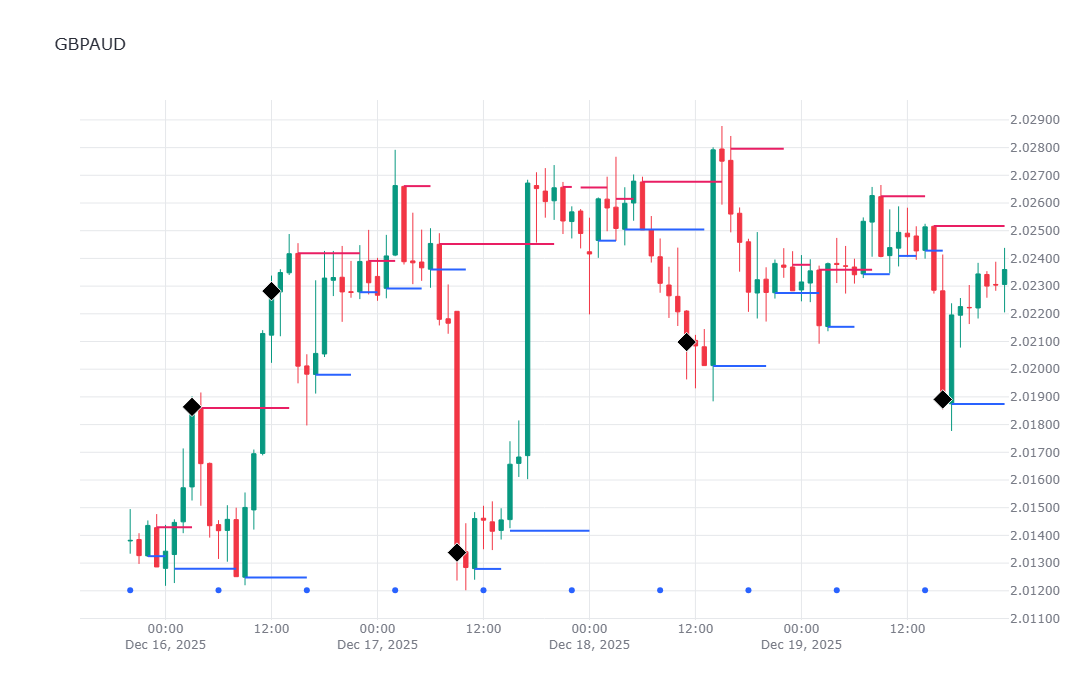

In [ ]:
import sys
import os
from datetime import datetime
from dotenv import load_dotenv
original_stdout = sys.stdout
original_stderr = sys.stderr
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')
dotenv_path = os.path.abspath(os.path.join("..", ".env"))
load_dotenv(dotenv_path)

os.environ['ZONE_INVERSION_MARGIN_MICROPIPS'] = '110'  # Zones Tuning
os.environ['BREAKOUT_MIN_STRENGTH_MICROPIPS'] = '100'  # Breakout Tuning
os.environ['MIN_RISK_DISTANCE_MICROPIPS'] = '0.001'

notebook_dir = os.getcwd()
if os.path.basename(notebook_dir) == "notebooks":
    parent_dir = os.path.abspath("..")
    if parent_dir not in sys.path:
        sys.path.insert(0, parent_dir)
from src.utils.config import Config
from src.models.timeframe import Timeframe
from src.utils.plot import plotly_plot
from main import backtesting

Config.show_debug_logs = True
# Tuning
# Config.zone_inversion_margin_micropips = 0 # Zones Tuning
# Config.breakout_min_strength_micropips = 100 # Breakout Tuning: We to break at least X amount of micropips in order to consider a breakout as valid
# Config.min_risk_distance_micropips = 0 


max_candles = 300
symbols = ['GBPJPY']
timeframe = Timeframe.M15
start_date = datetime(2025, 12, 1, 13, 10, 0)
end_date = datetime.now()



cerebro, data = backtesting(
        symbols=symbols,
        timeframe=timeframe,
        start_date=start_date,
        end_date=end_date,
        max_candles=max_candles
    )
for symbol_index, (symbol, pair_data) in enumerate(data.items()):
    plotly_plot(cerebro, pair_data, symbol, symbol_index=symbol_index, height=700)